In [6]:
import pandas as pd
import random
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from patsy import dmatrices
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.cross_validation import train_test_split
from sklearn import metrics
from sklearn.cross_validation import cross_val_score
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.model_selection import KFold
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

#set the random seed as zero
np.random.seed(0)

/Users/Mandy/anaconda3/lib/python3.6/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
/Users/Mandy/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [7]:
#input data 
creditData=pd.read_csv('/Users/Mandy/Study/SpringBoard/Capstone 1/Data/Modified Dataset.csv', header=0)

In [8]:
#subset macro-economic data
limit_bal=creditData.iloc[:,1]
sex=creditData.iloc[:,2]
education=creditData.iloc[:,3]
marriage=creditData.iloc[:,4]
age=creditData.iloc[:,5]
pay_0=creditData.iloc[:,6]
pay_2=creditData.iloc[:,7]
pay_3=creditData.iloc[:,8]
pay_4=creditData.iloc[:,9]
pay_5=creditData.iloc[:,10]
pay_6=creditData.iloc[:,11]
bill_amt1=creditData.iloc[:,12]
bill_amt2=creditData.iloc[:,13]
bill_amt3=creditData.iloc[:,14]
bill_amt4=creditData.iloc[:,15]
bill_amt5=creditData.iloc[:,16]
bill_amt6=creditData.iloc[:,17]
pay_amt1=creditData.iloc[:,18]
pay_amt2=creditData.iloc[:,19]
pay_amt3=creditData.iloc[:,20]
pay_amt4=creditData.iloc[:,21]
pay_amt5=creditData.iloc[:,22]
pay_amt6=creditData.iloc[:,23]
interest_rate=creditData.iloc[:,24]
employed_persons=creditData.iloc[:,25]
cpi=creditData.iloc[:,26]
consumer_confidence=creditData.iloc[:,27]
default_next_month=creditData.iloc[:,28]


In [9]:
# randomly pick the monthly datas to each cells for economic datas

for index,rowValue in interest_rate.iteritems():
        interest_rate[index]=random.choice([1.88,2,2.13])

for index,rowValue in employed_persons.iteritems():
        employed_persons[index]=random.choice([9916,9929,9931,9933,9949,9969])
        
for index,rowValue in cpi.iteritems():
        cpi[index]=random.choice([92.02,92.53,92.82,93.9,94.6,94.73])

for index,rowValue in consumer_confidence.iteritems():
        consumer_confidence[index]=random.choice([73.15,73.06,74.79,73.15,73.38,71.42])


In [10]:
#Data Exploration
default_next_month.value_counts()

0    23364
1     6636
Name: Default_Next_Month, dtype: int64

In [11]:
creditData.groupby('Default_Next_Month').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence
Default_Next_Month,,,,,,,,,,,,,,,,,,,,,
0,15064.893982,178099.726074,1.614150,1.841337,1.558637,35.417266,-0.211222,-0.301917,-0.316256,-0.355633,...,6307.337357,6640.465074,5753.496833,5300.529319,5248.220296,5719.371769,1.667565,9937.842707,92.839069,72.826271
1,14773.781947,130109.656420,1.567058,1.894665,1.528029,35.725738,0.668174,0.458258,0.362116,0.254521,...,3397.044153,3388.649638,3367.351567,3155.626733,3219.139542,3441.482068,1.665461,9937.920133,92.840265,72.851266


In [12]:
creditData.groupby('SEX').mean()

,ID,LIMIT_BAL,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
SEX,,,,,,,,,,,,,,,,,,,,,
1,14802.770104,163519.825034,1.839250,1.572090,36.519431,0.063257,-0.029189,-0.068557,-0.133832,-0.189182,...,5960.720138,5412.506057,4869.177995,4830.827052,5276.196753,1.669751,9937.878785,92.842362,72.826548,0.241672
2,15130.282078,170086.462014,1.862246,1.538593,34.806868,-0.069181,-0.202407,-0.230289,-0.277661,-0.316751,...,5895.200088,5103.057255,4797.786992,4778.752043,5175.665305,1.665360,9937.847394,92.837345,72.835247,0.207763


In [13]:
creditData.groupby('MARRIAGE').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
MARRIAGE,,,,,,,,,,,,,,,,,,,,,
0,15755.796296,132962.962963,1.740741,2.740741,37.814815,-0.166667,-0.203704,-0.203704,-0.370370,-0.407407,...,2781.944444,4027.944444,2864.222222,2124.518519,2238.388889,1.518519,9938.777778,92.759259,72.759259,0.092593
1,15253.288821,182200.893184,1.620031,1.985138,40.016692,-0.036752,-0.163262,-0.206238,-0.259243,-0.308441,...,6205.714401,5328.491983,5075.922469,4836.070503,5331.664836,1.666154,9937.819094,92.843327,72.832418,0.234717
2,14807.277813,156413.660737,1.589514,1.729454,31.452706,-0.002819,-0.111000,-0.135680,-0.191118,-0.232085,...,5648.984465,5123.063518,4612.971185,4781.813581,5162.734340,1.668254,9937.902907,92.834878,72.832811,0.209283
3,13734.154799,98080.495356,1.594427,2.235294,42.798762,0.170279,0.000000,0.024768,-0.024768,-0.142415,...,7865.136223,6150.086687,5121.179567,4563.919505,3408.987616,1.674923,9937.300310,92.904025,72.767802,0.260062


In [14]:
creditData.groupby('Interest_Rate').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Employed_Persons,CPI,Consumer_Confidence,Default_Next_Month
Interest_Rate,,,,,,,,,,,,,,,,,,,,,
1,14981.009913,168180.634825,1.606889,1.848503,1.548713,35.495644,-0.035446,-0.150195,-0.183238,-0.236808,...,5381.517973,5763.550516,5160.918594,4647.655953,4870.889156,5189.889056,9937.734755,92.838290,72.817062,0.222289
2,15010.226053,167136.845051,1.602159,1.855444,1.553440,35.480438,-0.007345,-0.125568,-0.157697,-0.212612,...,5804.336931,5999.816419,5257.999850,4915.113476,4763.706541,5228.284365,9937.922251,92.839854,72.839155,0.220657


In [15]:
creditData.groupby('Employed_Persons').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,CPI,Consumer_Confidence,Default_Next_Month
Employed_Persons,,,,,,,,,,,,,,,,,,,,,
9916,14890.969460,164237.492465,1.608800,1.860960,1.552944,35.464135,-0.018485,-0.115130,-0.156118,-0.209966,...,5502.389994,6188.294756,4974.258790,5119.685754,4960.874824,5335.395821,1.661644,92.851517,72.818766,0.221017
9929,14980.501916,165271.224037,1.608389,1.860456,1.549506,35.531760,0.000403,-0.119581,-0.150030,-0.207300,...,5746.679572,5574.488203,5102.526114,4524.014721,4397.361363,5305.611615,1.675539,92.839484,72.841299,0.221819
9931,15109.852595,166299.675588,1.606042,1.852798,1.557583,35.316910,-0.008110,-0.148418,-0.174574,-0.239659,...,5727.282238,5675.475872,5226.787916,4771.019059,4793.675994,5118.985199,1.677818,92.836172,72.825831,0.216748
9933,14921.361757,169405.671524,1.593541,1.848562,1.549232,35.500591,-0.035841,-0.118551,-0.152422,-0.228633,...,5619.523434,5953.180189,5234.564789,4657.335368,4912.527373,5414.529736,1.652028,92.835565,72.851516,0.220362
9949,15120.661037,170740.377062,1.597800,1.844658,1.545169,35.559898,-0.036135,-0.151218,-0.193637,-0.239592,...,5664.891202,6085.185978,5525.716418,4859.131186,5022.202082,4876.427926,1.659859,92.845247,72.827180,0.226237
9969,14979.335349,168822.587666,1.608222,1.851673,1.557033,35.536477,-0.001008,-0.149738,-0.170093,-0.198307,...,5722.634825,6042.807739,5282.858928,5026.950826,4700.435913,5245.404272,1.676340,92.827892,72.825877,0.220879


In [16]:
creditData.groupby('CPI').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,Consumer_Confidence,Default_Next_Month
CPI,,,,,,,,,,,,,,,,,,,,,
92,15024.933073,167302.325957,1.604628,1.841932,1.554180,35.419318,-0.014663,-0.129347,-0.161431,-0.227349,...,5744.071299,5855.311966,5318.876303,4742.282303,4819.653730,5137.462703,1.668326,9937.906639,72.834533,0.220892
93,15014.849587,168679.905623,1.605584,1.849980,1.543256,35.700944,-0.044436,-0.164569,-0.185804,-0.231616,...,5928.027527,6472.349587,5374.884389,5028.982108,4652.305938,5530.526740,1.657884,9938.090444,72.841919,0.221785
94,14957.081218,167148.402508,1.601473,1.871305,1.552802,35.474370,-0.005673,-0.124714,-0.163332,-0.205235,...,5410.606052,5739.585150,5012.247338,4847.356624,4843.854783,5171.509903,1.669951,9937.673833,72.822634,0.221360


In [17]:
creditData.groupby('Consumer_Confidence').mean()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,Interest_Rate,Employed_Persons,CPI,Default_Next_Month
Consumer_Confidence,,,,,,,,,,,,,,,,,,,,,
71,15037.411189,169315.884116,1.599001,1.880519,1.554246,35.642358,-0.049351,-0.167033,-0.213187,-0.257143,...,5792.101898,6017.338262,5077.383816,5024.401399,4583.971429,5086.764236,1.653147,9937.941658,92.848152,0.208791
73,15018.454196,167679.396935,1.604164,1.843692,1.551146,35.457241,-0.007139,-0.124707,-0.158255,-0.216714,...,5676.015176,5952.224602,5286.957067,4804.710249,4907.614448,5295.735011,1.670211,9937.821527,92.839349,0.224053
74,14890.834206,164850.459307,1.606769,1.863618,1.552377,35.441378,-0.022361,-0.136785,-0.150886,-0.199839,...,5483.820508,5698.854956,5127.941579,4712.334005,4579.860395,5021.545931,1.668614,9937.931910,92.830379,0.222200


In [18]:
creditData['x_bin']=pd.cut(x=creditData.AGE, bins=[20,30,40,50,60,70]) 

Text(0,0.5,'Frequency')

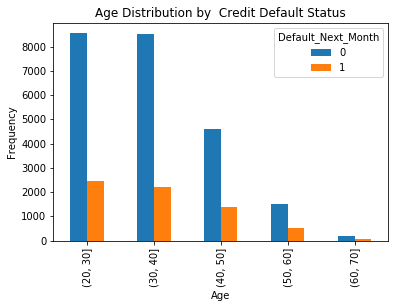

In [19]:
%matplotlib inline
#bar chart of age grouped by default
pd.crosstab(creditData.x_bin,default_next_month).plot(kind='bar')
plt.title('Age Distribution by  Credit Default Status')
plt.xlabel('Age')
plt.ylabel('Frequency')

In [20]:
#Separate the dataset into dependent and independent variables
X=creditData.drop('Default_Next_Month',axis=1)
X=X.drop('ID',axis=1)
X=X.drop('x_bin',axis=1) 
y=creditData['Default_Next_Month']

#then seperate it into training set, validation set and test set
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.15)
 

In [21]:
#######MODEL ONE: LOGISTIC REGRESSION MODEL######
LR_classifier = LogisticRegression()
LR_classifier.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [22]:
#10-fold cross-validation,if the evaluation score suggests not overfitting, predict the default status for each sample in test set
LR_cross_val_scores = cross_val_score(LR_classifier,X_train,y_train,scoring='accuracy',cv=10)
print("The 10 fold cross validation score based on Logistic Regression Model is: ",'%.3f'%LR_cross_val_scores.mean())

if LR_cross_val_scores.mean() >0.97:
    print (" The Logistic Regression Model is overfitting in this case.")
else:
    LR_predicted=LR_classifier.predict(X_test)
    #generate default probabilities based on test set
    LR_prob_default=np.sum(LR_predicted)/len(LR_predicted)
    print("The Default Probability based on Logistic Regression Model is :",'%.3f'%LR_prob_default)
    LR_accuracy=LR_classifier.score(X_test,y_test)
    print("The accuracy of Logistic Regression Model on test set is : ",'%.3f'%LR_accuracy)
    print(metrics.confusion_matrix(y_test,LR_predicted))
    print (metrics.classification_report(y_test,LR_predicted))
    

The 10 fold cross validation score based on Logistic Regression Model is:  0.778
The Default Probability based on Logistic Regression Model is : 0.000
The accuracy of Logistic Regression Model on test set is :  0.784
[[3529    0]
 [ 971    0]]
             precision    recall  f1-score   support

          0       0.78      1.00      0.88      3529
          1       0.00      0.00      0.00       971

avg / total       0.62      0.78      0.69      4500



/Users/Mandy/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [23]:
#create a dataframe to store evaluation info of different models
evaluation = pd.DataFrame({'Model':['Logistic Regression'],'Default_Probability':[LR_prob_default],'Cross_Validation_Accuracy':[LR_cross_val_scores.mean()],'Test_Accuracy':[LR_accuracy]})
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                 Model  Default_Probability  Cross_Validation_Accuracy  \
0  Logistic Regression                  0.0                   0.777765   

   Test_Accuracy  
0       0.784222  


In [24]:
#########MODEL TWO: RANDOM FOREST MODEL#########
RF_classifier = RandomForestClassifier(random_state=0)

In [38]:
# 10 Fold Cross Validation over the entire training set
kf=KFold(n_splits=10,shuffle=False)
RF_cross_val_score=0
for train_index, test_index in kf.split(X_train):
    X_train_subset, X_test_subset=X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_subset, y_test_subset=y_train.iloc[train_index],y_train.iloc[test_index]
    RF_classifier.fit(X_train_subset,y_train_subset)
    RF_cross_val_score=RF_cross_val_score+RF_classifier.score(X_test_subset,y_test_subset)
RF_cross_val_score=RF_cross_val_score/10
print("The 10 fold cross validation score based on Naive Bayes Model(Non Scaled) is: ",'%.3f'%RF_cross_val_score)

The 10 fold cross validation score based on Naive Bayes Model(Non Scaled) is:  0.804


In [26]:
# if the score is less than 0.975, then build the classifier with the entire training set
if RF_cross_val_score >0.97:
    print (" The Random Forest Model is overfitting in this case.")
else:
    RF_classifier.fit(X_train,y_train)
    RF_predicted=RF_classifier.predict(X_test)
    RF_prob_default=np.sum(RF_predicted)/len(RF_predicted)
    print("The Default Probability based on Random Forest Model is :",'%.3f'%RF_prob_default)
    RF_accuracy=RF_classifier.score(X_test,y_test)
    print("The accuracy of Random Forest Model on test set is : ",'%.3f'%RF_accuracy)
    print(metrics.confusion_matrix(y_test,RF_predicted))
    print(metrics.classification_report(y_test,RF_predicted))

The Default Probability based on Random Forest Model is : 0.109
The accuracy of Random Forest Model on test set is :  0.817
[[3358  171]
 [ 652  319]]
             precision    recall  f1-score   support

          0       0.84      0.95      0.89      3529
          1       0.65      0.33      0.44       971

avg / total       0.80      0.82      0.79      4500



In [27]:
features_weight=RF_classifier.fit(X_test,y_test).feature_importances_
feature_index = np.where(features_weight==max(features_weight))
feature_index=int(feature_index[0][0])
print("The most important feature is:",(list(X_test)[feature_index]))

The most important feature is: PAY_0


In [28]:
#output the result into the existing evaluation dataframe to compare with other model
new_evaluation=pd.DataFrame({'Model':["Random Forest"],'Default_Probability':[RF_prob_default],'Cross_Validation_Accuracy':[RF_cross_val_score],'Test_Accuracy':[RF_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                 Model  Default_Probability  Cross_Validation_Accuracy  \
0  Logistic Regression             0.000000                   0.777765   
0        Random Forest             0.108889                   0.803647   

   Test_Accuracy  
0       0.784222  
0       0.817111  


In [58]:
########MODEL THREE: NAIVE BAYES #######################
### Non Scaled ####
#10-fold cross validation for the entire standardized training data without scaling/normalization/standarization
NB_classifier=GaussianNB()
kf=KFold(n_splits=10,shuffle=False)
NB_cross_val_score=0
for train_index, test_index in kf.split(X_train):
    X_train_subset, X_test_subset=X_train.iloc[train_index],X_train.iloc[test_index]
    y_train_subset, y_test_subset=y_train.iloc[train_index],y_train.iloc[test_index]
    NB_classifier.fit(X_train_subset,y_train_subset)
    NB_cross_val_score=NB_cross_val_score+NB_classifier.score(X_test_subset,y_test_subset)
    
NB_cross_val_score=NB_cross_val_score/10
print("The 10 fold cross validation score based on Naive Bayes Model is: ",'%.3f'%NB_cross_val_score)

The 10 fold cross validation score based on Naive Bayes Model is:  0.377


In [35]:
if NB_cross_val_score >0.97:
    print ("The Naive Bayes Model is overfitting in this case.")
else:
    NB_classifier.fit(X_train,y_train)
    NB_predicted=NB_classifier.predict(X_test)
    NB_prob_default=np.sum(NB_predicted)/len(NB_predicted)
    print("The Default Probability based on Naive Bayes Model is :",'%.3f'%NB_prob_default)
    NB_accuracy=NB_classifier.score(X_test,y_test)
    print("The accuracy of Naive Bayes Model on test set is : ",'%.3f'%NB_accuracy)

The Default Probability based on Naive Bayes Model is : 0.805
The accuracy of Naive Bayes Model on test set is :  0.367


In [36]:
#output the result into the existing evaluation dataframe to compare with other models
new_evaluation=pd.DataFrame({'Model':["Naive Bayes_NonScaled"],'Default_Probability':[NB_prob_default],'Cross_Validation_Accuracy':[NB_cross_val_score],'Test_Accuracy':[NB_accuracy]})
evaluation = evaluation.append(new_evaluation)
evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
print(evaluation)

                   Model  Default_Probability  Cross_Validation_Accuracy  \
0    Logistic Regression             0.000000                   0.777765   
0          Random Forest             0.108889                   0.803647   
0  Naive Bayes_NonScaled             0.804889                   0.377490   

   Test_Accuracy  
0       0.784222  
0       0.817111  
0       0.367333  


In [56]:
#10-fold cross validation for the entire standardized training set
NB_cross_val_score_scaled=0
for NBtrain_index, NBtest_index in kf.split(X_train):
    X_train_subset, X_test_subset=X_train.iloc[NBtrain_index],X_train.iloc[NBtest_index]
    y_train_subset, y_test_subset=y_train.iloc[NBtrain_index],y_train.iloc[NBtest_index]
    #standardization
    X_train_scaled_subset=(X_train_subset-X_train_subset.mean())/X_train_subset.std()
    y_train_scaled_subset=(y_train_subset-y_train_subset.mean())/y_train_subset.std()
    X_test_scaled_subset=(X_test_subset-X_test_subset.mean())/X_test_subset.std()
    y_test_scaled_subset=(y_test_subset-y_test_subset.mean())/y_test_subset.std()
    # turn the dataframe subset, which is 2D array into 1D array
    y_train_scaled_subset=np.asarray(y_train_scaled_subset,dtype="|S6")
    y_test_scaled_subset=np.asarray(y_test_scaled_subset,dtype="|S6")
    NB_classifier.fit(X_train_scaled_subset,y_train_scaled_subset)
    NB_predicted_subset=NB_classifier.predict(X_test_scaled_subset)
    print(NB_predicted_subset)
    print(y_test_scaled_subset)
    print("####################################")
    NB_cross_val_score_scaled=NB_cross_val_score_scaled+NB_classifier.score(X_test_scaled_subset,y_test_scaled_subset)

    NB_cross_val_score_scaled=NB_cross_val_score_scaled/10
print("The 10 fold cross validation score based on Naive Bayes Model(Scaled) is: ",'%.3f'%NB_cross_val_score_scaled)

[b'1.8689' b'1.8689' b'1.8689' ..., b'1.8689' b'1.8689' b'1.8689']
[b'1.8912' b'1.8912' b'-0.528' ..., b'-0.528' b'1.8912' b'-0.528']
####################################
[b'1.8649' b'1.8649' b'1.8649' ..., b'-0.536' b'1.8649' b'-0.536']
[b'1.9289' b'1.9289' b'-0.518' ..., b'-0.518' b'-0.518' b'-0.518']
####################################
[b'-0.534' b'-0.534' b'-0.534' ..., b'-0.534' b'1.8703' b'1.8703']
[b'1.8782' b'-0.532' b'-0.532' ..., b'-0.532' b'-0.532' b'1.8782']
####################################
[b'-0.534' b'1.8700' b'-0.534' ..., b'1.8700' b'-0.534' b'-0.534']
[b'-0.531' b'1.8804' b'-0.531' ..., b'1.8804' b'-0.531' b'-0.531']
####################################
[b'1.8686' b'-0.535' b'-0.535' ..., b'-0.535' b'-0.535' b'-0.535']
[b'-0.527' b'-0.527' b'-0.527' ..., b'-0.527' b'-0.527' b'-0.527']
####################################
[b'-0.533' b'-0.533' b'-0.533' ..., b'-0.533' b'-0.533' b'-0.533']
[b'-0.538' b'-0.538' b'-0.538' ..., b'-0.538' b'-0.538' b'-0.538']
###########

In [61]:
if NB_cross_val_score >0.97:
    print (" The Naive Bayes Model (scaled) is overfitting in this case.")
else:
    #standardization
    X_train_scaled=(X_train-X_train.mean())/X_train.std()
    y_train_scaled=(y_train-y_train.mean())/y_train.std()
    X_test_scaled=(X_test-X_test.mean())/X_test.std()
    y_test_scaled=(y_test-y_test.mean())/y_test.std()
    # turn the dataframe subset, which is 2D array into 1D array
    y_train_scaled=np.asarray(y_train_scaled,dtype="|S6")
    y_test_scaled=np.asarray(y_test_scaled,dtype="|S6") 
    NB_classifier.fit(X_train_scaled,y_train_scaled)
    NB_predicted_scaled=NB_classifier.predict(X_test_scaled)
    NB_predicted_default=pd.value_counts(pd.Series(NB_predicted_scaled))[1]
    NB_predicted_nondefault=pd.value_counts(pd.Series(NB_predicted_scaled))[0] 
    NB_prob_default_scaled=NB_predicted_default/(NB_predicted_default+NB_predicted_nondefault)
    print("The Default Probability based on Naive Bayes Model is :",'%.3f'%NB_prob_default_scaled)
    #print(pd.value_counts(pd.Series(NB_predicted_scaled)))
    #print(y_test_scaled.)
    #print(accuracy_score(y_test_scaled,NB_predicted_scaled))
    NB_accuracy=NB_classifier.score(X_test_scaled,y_test_scaled)
    print("The accuracy of Naive Bayes Model on test set is : ",'%.3f'%NB_accuracy)

The Default Probability based on Naive Bayes Model is : 0.347
The accuracy of Naive Bayes Model on test set is :  0.000


In [ ]:
#output the result into the existing evaluation dataframe to compare with other models
#new_evaluation=pd.DataFrame({'Model':["Naive Bayes"],'Default_Probability':[NB_prob_default],'Cross_Validation_Accuracy':[NB_cross_val_score],'Test_Accuracy':[NB_accuracy]})
#evaluation = evaluation.append(new_evaluation)
#evaluation=evaluation[['Model','Default_Probability','Cross_Validation_Accuracy','Test_Accuracy']]
#print(evaluation)